# Prep Data

In [2]:
from tensorflow import keras

max_features = 10000
maxlen =  500
batch_size = 32

print("Loading data...")
(input_train, y_train), (input_test, y_test) = keras.datasets.imdb.load_data(
num_words = max_features
)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = keras.preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = keras.preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)
print('input train shape:', input_train.shape)
print('input test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input train shape: (25000, 500)
input test shape: (25000, 500)


# Training with Embedding and Simple RNN

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.SimpleRNN(32))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 91ms/step - loss: 0.6922 - acc: 0.5243 - val_loss: 0.6856 - val_acc: 0.5408
Epoch 2/10
157/157 [==============================] - 15s 97ms/step - loss: 0.5522 - acc: 0.7294 - val_loss: 0.4157 - val_acc: 0.8208
Epoch 3/10
157/157 [==============================] - 15s 94ms/step - loss: 0.3105 - acc: 0.8780 - val_loss: 0.3765 - val_acc: 0.8388
Epoch 4/10
157/157 [==============================] - 15s 95ms/step - loss: 0.2238 - acc: 0.9136 - val_loss: 0.3982 - val_acc: 0.8492
Epoch 5/10
157/157 [==============================] - 15s 98ms/step - loss: 0.1625 - acc: 0.9410 - val_loss: 0.5485 - val_acc: 0.8204
Epoch 6/10
157/157 [==============================] - 16s 99ms/step - loss: 0.0965 - acc: 0.9692 - val_loss: 0.5205 - val_acc: 0.7988
Epoch 7/10
157/157 [==============================] - 16s 99ms/step - loss: 0.0556 - acc: 0.9841 - val_loss: 0.6061 - val_acc: 0.7822
Epoch 8/10
157/157 [==============================] - 16s 100m

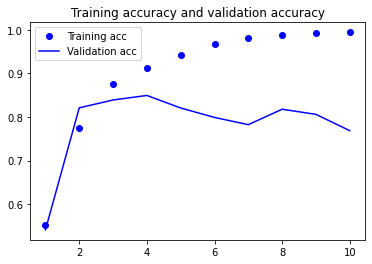

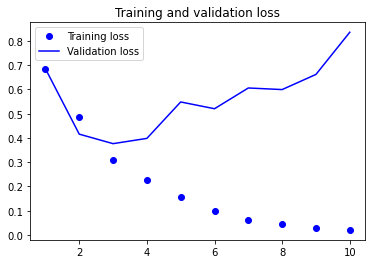

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()